In [1]:
#!pip install wfdb
#!pip install datasets
#os.chdir('/Users/naubergois/ECGProject/')

In [2]:
import wfdb 
record = wfdb.rdsamp('./Dados/100')
annotation = wfdb.rdann('./Dados/100', 'atr')

In [3]:
normal = [100,101,103,105,106,112,113,114,115,116,117,121,122,123,201,202,205,209,213,215,219,220,222,234]
abnormal = [104,108,109,111,118,119,124,200,203,207,208,210,212,214,217,221,223,228,230,231,232]


In [4]:
len(record[0])

650000

In [5]:
record

(array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 {'base_date': None,
  'base_time': None,
  'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
  'fs': 360,
  'n_sig': 2,
  'sig_len': 650000,
  'sig_name': ['MLII', 'V5'],
  'units': ['mV', 'mV']})

In [6]:
record_=record[1]

In [7]:
print ('Sampling frequency used for this record:', record_['fs'])


Sampling frequency used for this record: 360


In [8]:
data = record[0]
print (data)
channel = data[:, 0]

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]


In [9]:
print (data[:,1])

[-0.065 -0.065 -0.065 ... -0.365 -0.335  0.   ]


In [10]:
from matplotlib import pyplot as plt

In [11]:
howmany = 2000

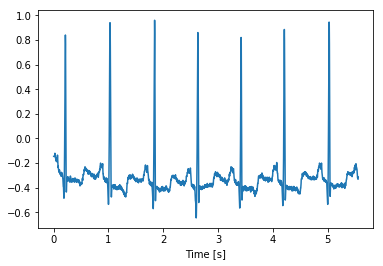

In [12]:
import numpy as np
times = np.arange(howmany, dtype = 'float') / record_['fs']
plt.plot(times, channel[ : howmany])
plt.xlabel('Time [s]')
plt.show()

In [13]:
def get_ecg_data(datfile): 
    ## convert .dat/q1c to numpy arrays
    recordname=os.path.basename(datfile).split(".dat")[0]
    recordpath=os.path.dirname(datfile)
    #cwd=os.getcwd()
    #os.chdir(recordpath) ## somehow it only works if you chdir. 
    
    #Alterado por Ramses
    testando=os.path.basename(datfile).split(".dat")[0]

    
    annotation = wfdb.rdann('./Dados/'+recordname, 'atr')  
    record = wfdb.rdsamp('./Dados/'+recordname)
    
    record_=record[1]
    data = record[0]
    #print (data)
    channel = data[:, 0]
    
    
    #times = np.arange(howmany, dtype = 'float') / record_['fs']
   # plt.plot(times, channel[ : howmany])
    #plt.xlabel('Time [s]')
   # plt.show()
   
    return  data,annotation,testando



#### Acrescentei a variavel "testando"

In [14]:
def LoaddDatFiles(datfiles):  
    print ("Teste")
    
    
    sinais = []
    target=[] 
    
    testando=[]
        
    for datfile in datfiles:
        
        print ("Carregando arquivo..... "+datfile)
       
      #z_testando Ramses
        x,y,z_testando=get_ecg_data(datfile)
      
         

        try: 

                #sinais.append(xx)
                sinais.append(x)
                target.append(y)
                
                testando.append(z_testando)
       
        except NameError: 
                xx = x
                yy = y
                zz = z_testando
    return sinais,target,testando

In [15]:
def imprime_sinais(XX):
    
    for sinal in XX:
        
        print (sinal)
        
        channel = sinal[:, 0]
        
        print ("Canal 0")
        
        times = np.arange(howmany, dtype = 'float') / record_['fs']
        plt.plot(times, channel[ : howmany])
        plt.xlabel('Time [s]')
        plt.show()
        
        
        channel = sinal[:, 1]
        
        
        print ("Canal 1")
        
        times = np.arange(howmany, dtype = 'float') / record_['fs']
        plt.plot(times, channel[ : howmany])
        plt.xlabel('Time [s]')
        plt.show()



In [16]:
import glob, os
from os.path import basename
datfiles=glob.glob("./Dados/"+"*.dat")
perct=0.81



In [17]:
int(round(len(datfiles)*perct))

37

In [18]:
datfiles

['./Dados\\100.dat',
 './Dados\\101.dat',
 './Dados\\103.dat',
 './Dados\\104.dat',
 './Dados\\105.dat',
 './Dados\\106.dat',
 './Dados\\107.dat',
 './Dados\\108.dat',
 './Dados\\109.dat',
 './Dados\\111.dat',
 './Dados\\112.dat',
 './Dados\\113.dat',
 './Dados\\114.dat',
 './Dados\\115.dat',
 './Dados\\116.dat',
 './Dados\\117.dat',
 './Dados\\118.dat',
 './Dados\\119.dat',
 './Dados\\121.dat',
 './Dados\\122.dat',
 './Dados\\123.dat',
 './Dados\\200.dat',
 './Dados\\201.dat',
 './Dados\\202.dat',
 './Dados\\203.dat',
 './Dados\\205.dat',
 './Dados\\207.dat',
 './Dados\\208.dat',
 './Dados\\209.dat',
 './Dados\\210.dat',
 './Dados\\212.dat',
 './Dados\\213.dat',
 './Dados\\214.dat',
 './Dados\\215.dat',
 './Dados\\217.dat',
 './Dados\\219.dat',
 './Dados\\220.dat',
 './Dados\\221.dat',
 './Dados\\222.dat',
 './Dados\\223.dat',
 './Dados\\228.dat',
 './Dados\\230.dat',
 './Dados\\231.dat',
 './Dados\\232.dat',
 './Dados\\233.dat',
 './Dados\\234.dat']

In [19]:
#xxt,yyt=LoaddDatFiles(datfiles[ :int(round(len(datfiles)*perct))]) # training data. 

In [20]:
#xxt
#yyt

In [21]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [22]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
#imprime_sinais(xxt_ramses)

In [23]:
data = record[0]
print (data)
channel = data[:, 0]

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]


In [24]:
import glob, os
from os.path import basename
datfiles=glob.glob("./Dados/"+"*.dat")

In [25]:
type(datfiles)

list

In [26]:
datfiles[0]

'./Dados\\100.dat'

In [27]:
xxt_ramses,yyt_ramses,zzt_ramses=LoaddDatFiles(datfiles)

Teste
Carregando arquivo..... ./Dados\100.dat
Carregando arquivo..... ./Dados\101.dat
Carregando arquivo..... ./Dados\103.dat
Carregando arquivo..... ./Dados\104.dat
Carregando arquivo..... ./Dados\105.dat
Carregando arquivo..... ./Dados\106.dat
Carregando arquivo..... ./Dados\107.dat
Carregando arquivo..... ./Dados\108.dat
Carregando arquivo..... ./Dados\109.dat
Carregando arquivo..... ./Dados\111.dat
Carregando arquivo..... ./Dados\112.dat
Carregando arquivo..... ./Dados\113.dat
Carregando arquivo..... ./Dados\114.dat
Carregando arquivo..... ./Dados\115.dat
Carregando arquivo..... ./Dados\116.dat
Carregando arquivo..... ./Dados\117.dat
Carregando arquivo..... ./Dados\118.dat
Carregando arquivo..... ./Dados\119.dat
Carregando arquivo..... ./Dados\121.dat
Carregando arquivo..... ./Dados\122.dat
Carregando arquivo..... ./Dados\123.dat
Carregando arquivo..... ./Dados\200.dat
Carregando arquivo..... ./Dados\201.dat
Carregando arquivo..... ./Dados\202.dat
Carregando arquivo..... ./Dados\20

##### Trabalhando com todos os arquivos ".dat" sem separa-los em treino e teste

In [28]:
len(datfiles)

46

In [29]:
xxt_ramses[0]

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]])

In [30]:
type(xxt_ramses[0])

numpy.ndarray

##### Aqui verificamos o tamanho de cada procedimento - possuem 650000 X 2 canais

In [31]:
xxt_ramses[0].shape 

(650000, 2)

##### Analisando os canais

In [32]:
#canal 0
xxt_ramses[0][:, 0]

array([-0.145, -0.145, -0.145, ..., -0.675, -0.765, -1.28 ])

In [33]:
xxt_ramses[0][:, 0].shape

(650000,)

In [34]:
type(xxt_ramses[0][:, 0])

numpy.ndarray

In [35]:
#canal 1
xxt_ramses[0][:, 1]

array([-0.065, -0.065, -0.065, ..., -0.365, -0.335,  0.   ])

#### Vamos trabalhar apenas com o canal 0

In [36]:
#Verificando o id do exame
testando=os.path.basename(datfiles[0]).split(".dat")[0]

In [37]:
testando

'100'

In [38]:
yyt_ramses[0]

In [39]:
type(zzt_ramses)

list

In [40]:
len(zzt_ramses)

46

In [41]:
import pandas as pd
import numpy as np

In [42]:
#Neste momento estou pegando o "canal 0" e inserindo o "id" do exame
#lembrando que estamos trabalhando apenas com o canal 0
df = pd.DataFrame()

for i in range(len(datfiles)):
    
    aaaa = pd.DataFrame(xxt_ramses[i][:, 0])
    
    aaaa = np.transpose(aaaa)
    
    df = df.append(aaaa)
    
    
   # df.append(xxt_ramses[i][:, 0])
    #print(df)
    print(zzt_ramses[i], " - ",xxt_ramses[i][:, 0])
    #print(aaaa)
#print(df)

df['dono'] = zzt_ramses
print(df)

100  -  [-0.145 -0.145 -0.145 ... -0.675 -0.765 -1.28 ]
101  -  [-0.345 -0.345 -0.345 ... -0.295 -0.29   0.   ]
103  -  [-0.375 -0.375 -0.375 ... -0.235 -0.245  0.   ]
104  -  [-0.15  -0.15  -0.15  ... -0.065 -0.06   0.   ]
105  -  [-0.445 -0.445 -0.445 ...  0.59   0.76   1.28 ]
106  -  [-0.31  -0.31  -0.31  ...  0.635  0.265  0.   ]
107  -  [-2.045 -2.045 -2.045 ... -0.645 -0.635  0.   ]
108  -  [-0.125 -0.125 -0.125 ... -0.01   0.04   0.   ]
109  -  [ 0.175  0.175  0.175 ... -0.92  -0.91  -1.28 ]
111  -  [-0.035 -0.035 -0.035 ...  0.155  0.2    0.   ]
112  -  [-0.75  -0.75  -0.75  ... -0.825 -0.81  -1.28 ]
113  -  [-0.46 -0.46 -0.46 ...  1.06  0.42  0.  ]
114  -  [-0.045 -0.045 -0.045 ... -0.365 -0.37   0.   ]
115  -  [-0.58 -0.58 -0.58 ... -0.75 -0.75 -1.28]
116  -  [-0.32  -0.32  -0.32  ... -0.975 -0.96  -1.28 ]
117  -  [-0.925 -0.925 -0.925 ... -0.585 -0.565  0.   ]
118  -  [-0.835 -0.835 -0.835 ...  0.03   0.085  0.   ]
119  -  [-0.995 -0.995 -0.995 ...  1.565  1.525  1.28 ]
121 

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,649991,649992,649993,649994,649995,649996,649997,649998,649999,dono
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,0.920,0.895,0.720,0.375,-0.075,-0.445,-0.675,-0.765,-1.28,100
0,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,-0.320,...,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00,101
0,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.385,-0.385,...,-0.125,-0.150,-0.165,-0.170,-0.200,-0.225,-0.235,-0.245,0.00,103
0,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.145,-0.135,...,-0.090,-0.085,-0.085,-0.085,-0.070,-0.070,-0.065,-0.060,0.00,104
0,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.450,-0.430,...,-0.285,-0.225,-0.120,0.040,0.225,0.410,0.590,0.760,1.28,105


In [44]:
df.shape

(46, 650001)

###### Repetindo as informações dos resultados dos exames

In [45]:
normal = [100,101,103,105,106,112,113,114,115,116,117,121,122,123,201,202,205,209,213,215,219,220,222,234]
abnormal = [104,108,109,111,118,119,124,200,203,207,208,210,212,214,217,221,223,228,230,231,232]

In [46]:
#Atribuido o valor "0" para normal e "1" para abnormal
normal_abnormal = pd.DataFrame(normal)
normal_abnormal_1 = pd.DataFrame(abnormal)
normal_abnormal['resultado'] = 0
normal_abnormal_1['resultado'] = 1 

normal_abnormal = normal_abnormal.append(normal_abnormal_1, ignore_index=True)
normal_abnormal.shape

(45, 2)

In [47]:
#df.index = df.dono
#normal_abnormal.index = normal_abnormal.dono

In [48]:
normal_abnormal.columns = ['dono','resultado']
#normal_abnormal.index = normal_abnormal.dono

In [49]:
normal_abnormal.head()

,dono,resultado
0,100,0
1,101,0
2,103,0
3,105,0
4,106,0


In [50]:
type(normal_abnormal)

pandas.core.frame.DataFrame

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,649991,649992,649993,649994,649995,649996,649997,649998,649999,dono
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,0.920,0.895,0.720,0.375,-0.075,-0.445,-0.675,-0.765,-1.28,100
0,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,-0.320,...,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00,101
0,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.385,-0.385,...,-0.125,-0.150,-0.165,-0.170,-0.200,-0.225,-0.235,-0.245,0.00,103
0,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.145,-0.135,...,-0.090,-0.085,-0.085,-0.085,-0.070,-0.070,-0.065,-0.060,0.00,104
0,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.450,-0.430,...,-0.285,-0.225,-0.120,0.040,0.225,0.410,0.590,0.760,1.28,105


In [52]:
type(df)

pandas.core.frame.DataFrame

In [53]:
normal_abnormal = normal_abnormal.sort_values('dono')
df = df.sort_values('dono')

In [54]:
df['dono'] = df['dono'].astype('int64')
df['dono']

0    100
0    101
0    103
0    104
0    105
0    106
0    107
0    108
0    109
0    111
0    112
0    113
0    114
0    115
0    116
0    117
0    118
0    119
0    121
0    122
0    123
0    200
0    201
0    202
0    203
0    205
0    207
0    208
0    209
0    210
0    212
0    213
0    214
0    215
0    217
0    219
0    220
0    221
0    222
0    223
0    228
0    230
0    231
0    232
0    233
0    234
Name: dono, dtype: int64

In [55]:
normal_abnormal['dono']

0     100
1     101
2     103
24    104
3     105
4     106
25    108
26    109
27    111
5     112
6     113
7     114
8     115
9     116
10    117
28    118
29    119
11    121
12    122
13    123
30    124
31    200
14    201
15    202
32    203
16    205
33    207
34    208
17    209
35    210
36    212
18    213
37    214
19    215
38    217
20    219
21    220
39    221
22    222
40    223
41    228
42    230
43    231
44    232
23    234
Name: dono, dtype: int64

In [56]:
result = pd.merge(df,normal_abnormal,how='inner')

In [57]:
result

,0,1,2,3,4,5,6,7,8,9,...,649992,649993,649994,649995,649996,649997,649998,649999,dono,resultado
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,0.895,0.720,0.375,-0.075,-0.445,-0.675,-0.765,-1.28,100,0
1,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,-0.320,...,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00,101,0
2,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.385,-0.385,...,-0.150,-0.165,-0.170,-0.200,-0.225,-0.235,-0.245,0.00,103,0
3,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.145,-0.135,...,-0.085,-0.085,-0.085,-0.070,-0.070,-0.065,-0.060,0.00,104,1
4,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.450,-0.430,...,-0.225,-0.120,0.040,0.225,0.410,0.590,0.760,1.28,105,0
5,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.290,-0.285,...,1.785,1.690,1.550,1.355,1.040,0.635,0.265,0.00,106,0
6,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.135,-0.125,...,-0.095,-0.110,-0.155,-0.165,-0.095,-0.010,0.040,0.00,108,1
7,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.180,...,-0.885,-0.875,-0.900,-0.900,-0.910,-0.920,-0.910,-1.28,109,1
8,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,...,-0.090,-0.035,0.030,0.065,0.110,0.155,0.200,0.00,111,1
9,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.760,-0.770,-0.775,...,-0.915,-0.890,-0.885,-0.845,-0.820,-0.825,-0.810,-1.28,112,0


In [58]:
result.shape

(44, 650002)

##### Neste momento verifiquei que o shape somente ficou com 44 linhas

In [59]:
#Abaixo notamos que não possuimos o arquivo "124.dat"
#e tambem não possuimos os ressultados para "107" e "233"

dono_df = pd.DataFrame(df['dono'])
dono_df['Tabela_df'] = 'ok'
dono_normal_abnormal = pd.DataFrame(normal_abnormal['dono'])
dono_normal_abnormal['Tabela_normal_abnormal'] = 'ok'
verificando_ids = pd.merge(dono_df,dono_normal_abnormal,how='outer')
verificando_ids

,dono,Tabela_df,Tabela_normal_abnormal
0,100,ok,ok
1,101,ok,ok
2,103,ok,ok
3,104,ok,ok
4,105,ok,ok
5,106,ok,ok
6,107,ok,NaN
7,108,ok,ok
8,109,ok,ok
9,111,ok,ok


In [60]:
resultado = result.drop('dono',axis=1)
resultado.head()

,0,1,2,3,4,5,6,7,8,9,...,649991,649992,649993,649994,649995,649996,649997,649998,649999,resultado
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,0.920,0.895,0.720,0.375,-0.075,-0.445,-0.675,-0.765,-1.28,0
1,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,-0.320,...,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00,0
2,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.385,-0.385,...,-0.125,-0.150,-0.165,-0.170,-0.200,-0.225,-0.235,-0.245,0.00,0
3,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.145,-0.135,...,-0.090,-0.085,-0.085,-0.085,-0.070,-0.070,-0.065,-0.060,0.00,1
4,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.450,-0.430,...,-0.285,-0.225,-0.120,0.040,0.225,0.410,0.590,0.760,1.28,0


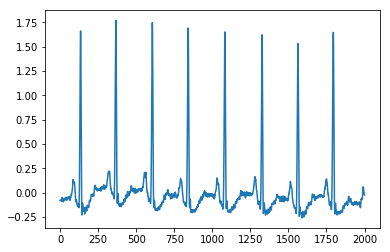

In [61]:
testePlot = pd.DataFrame(xxt_ramses[i][:, 0])
testePlot.head()
import matplotlib.pyplot as plt
plt.plot(testePlot[:2000])
plt.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler
# Normaliza os dados
# As LSTMs são sensíveis à escala dos dados de entrada, especificamente quando funções de ativação sigmoide (padrão)
# ou tanh são usadas. Pode ser uma boa prática redimensionar os dados para o range de 0 a 1, 
# também chamado de normalização. Podemos normalizar facilmente o conjunto de dados usando a classe MinMaxScaler do scikit-learn
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(resultado)

In [63]:
dataset[[0]]

array([[0.63197026, 0.63197026, 0.63197026, ..., 0.16727273, 0.        ,
        0.        ]])

In [64]:
scaler.inverse_transform(dataset[[0]])

array([[-0.145, -0.145, -0.145, ..., -0.765, -1.28 ,  0.   ]])

In [65]:
retornando_valores_normais = scaler.inverse_transform(dataset[[0]])
retornando_valores_normais

array([[-0.145, -0.145, -0.145, ..., -0.765, -1.28 ,  0.   ]])

In [66]:
dataset.shape

(44, 650001)

In [67]:
#Verificando coluna target dos dados normalizados
dataset[:,650000]

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0.])

In [68]:
from sklearn import model_selection
# Separando o array em componentes de input e output
X = dataset[:,0:650000]
Y = dataset[:,650000]
seed = 7

teste_size = 0.3

X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

In [69]:
X.shape

(44, 650000)

In [70]:
print(Y.shape)
print(Y)

(44,)
[0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.]


In [71]:
print("Quantidade de Registros Treino: ", X_treino.shape[0])
print()
print("---")
print("Quantidade de Registros de Teste: ", X_teste.shape[0])
print()
print("---")

Quantidade de Registros Treino:  30

---
Quantidade de Registros de Teste:  14

---


In [72]:
# Imports
#import numpy
#from keras.datasets import imdb
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers.embeddings import Embedding
#from keras.preprocessing import sequence

In [73]:
#import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session
#config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.3
#set_session(tf.Session(config=config))

In [74]:
# Cria o modelo
# Agora podemos definir, compilar e ajustar nosso modelo LSTM. A primeira camada é a camada Embedding, 
# que usa 32 vetores para representar cada palavra. A próxima camada é a camada LSTM com 100
# unidades de memória (neurônios inteligentes). Finalmente, como este é um problema de classificação, 
# usamos uma camada Densa com um único neurônio de saída e ativação sigmóide, que vai gerar previsões igual a 0 ou 1.
# Por se tratar de um problema de classificação binária, usamos como a função de perda (crossentropy binário em Keras). O ADAM conhecido
# O algoritmo de otimização ADAM é usado. O modelo é treinado por apenas 3 épocas pois ele rapidamente pode apresentar 
# overfitting. Um grande tamanho do lote de 64 avaliações é usado para espaçar as atualizações de peso.

#embedding_vector_length = 1
#model = Sequential()
#model.add(Embedding(10000, embedding_vector_length, input_length = 650000))
#model.add(LSTM(100))
#model.add(Dense(1, activation = 'sigmoid'))
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#print(model.summary())
#model.fit(X_treino, Y_treino, epochs = 3, batch_size = 64)

In [75]:
#embedding_vector_length = 1
#model = Sequential()
#model.add(Embedding(20000, embedding_vector_length, input_length = 650000))
#model.add(LSTM(100))
#model.add(Dense(1, activation = 'sigmoid'))
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#print(model.summary())
#model.fit(X_treino, Y_treino, epochs = 3, batch_size = 64)